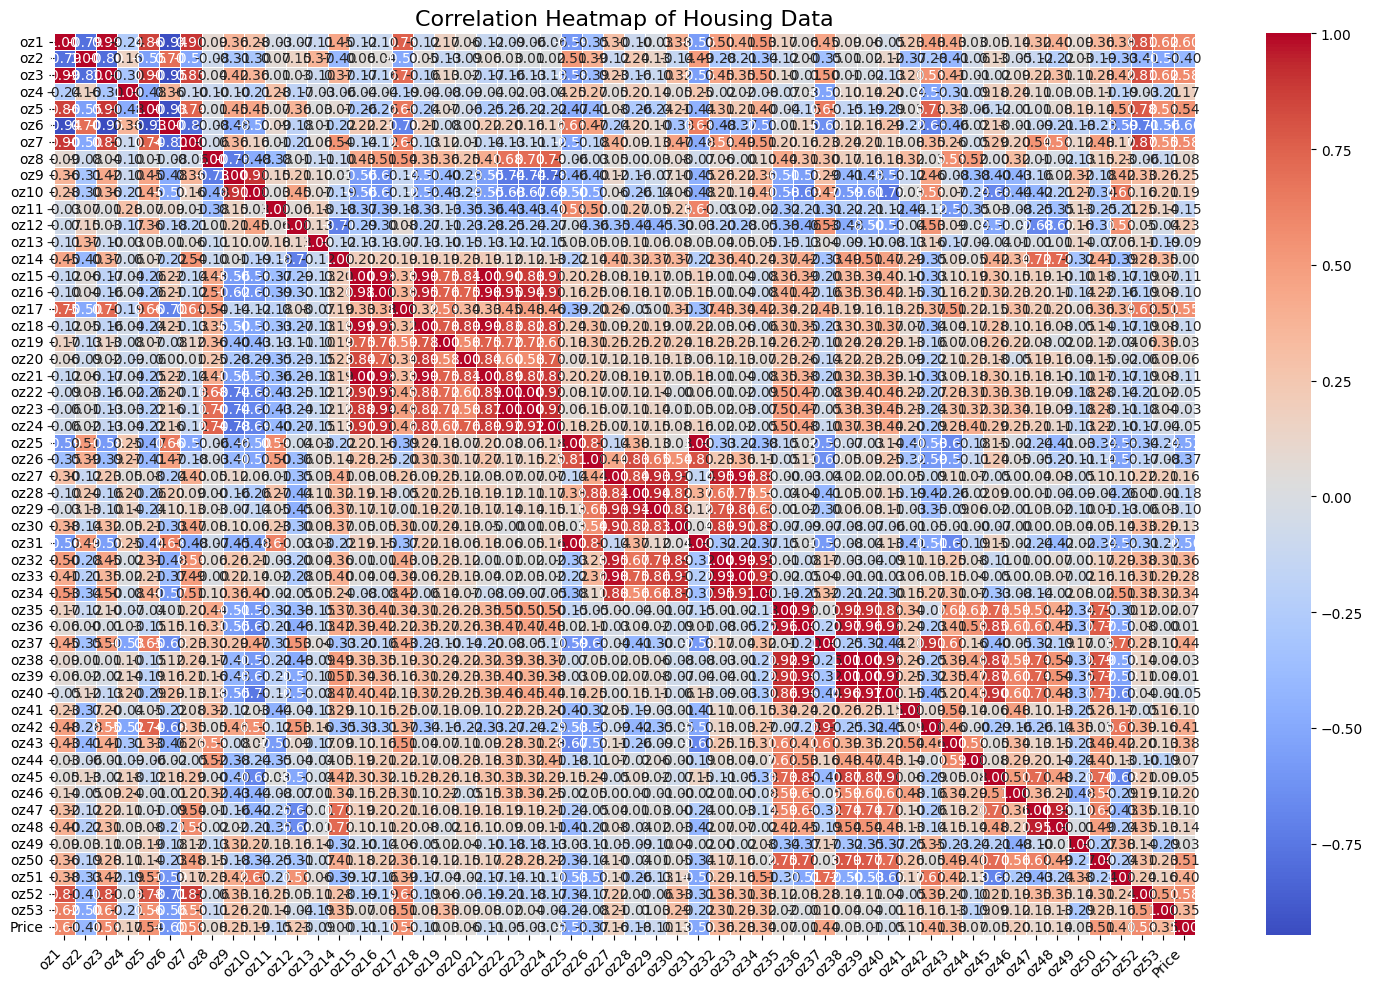

Variance Inflation Factors (VIF):
    Feature  VIF
0    const  0.0
1      oz1  inf
2      oz2  inf
3      oz3  inf
4      oz4  inf
5      oz5  inf
6      oz6  inf
7      oz7  inf
8      oz8  inf
9      oz9  inf
10    oz10  inf
11    oz11  inf
12    oz12  inf
13    oz13  inf
14    oz14  inf
15    oz15  inf
16    oz16  inf
17    oz17  inf
18    oz18  inf
19    oz19  inf
20    oz20  inf
21    oz21  inf
22    oz22  inf
23    oz23  inf
24    oz24  inf
25    oz25  inf
26    oz26  inf
27    oz27  inf
28    oz28  inf
29    oz29  inf
30    oz30  inf
31    oz31  inf
32    oz32  inf
33    oz33  inf
34    oz34  inf
35    oz35  inf
36    oz36  inf
37    oz37  inf
38    oz38  inf
39    oz39  inf
40    oz40  inf
41    oz41  inf
42    oz42  inf
43    oz43  inf
44    oz44  inf
45    oz45  inf
46    oz46  inf
47    oz47  inf
48    oz48  inf
49    oz49  inf
50    oz50  inf
51    oz51  inf
52    oz52  inf
53    oz53  inf
Root Mean Squared Error (RMSE): 1.3730342627493364
R-squared: -50.299291511599975


c:\Users\karti\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\karti\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


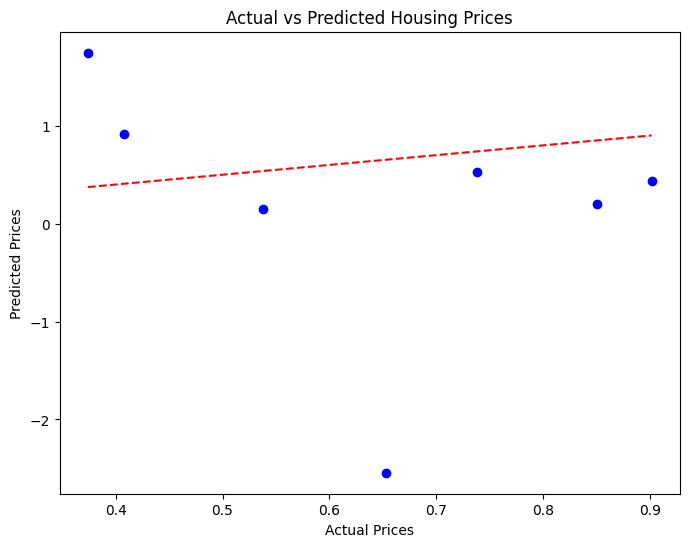

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Fetch the Boston Housing dataset from OpenML
boston = fetch_openml(data_id=421)

# Convert the dataset to a pandas DataFrame
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

# Add the target column 'Price' to the DataFrame
boston_df['Price'] = boston.target

# Step 1: Explore Correlation
corr = boston_df.corr()

# Plot Correlation Heatmap with improved readability
plt.figure(figsize=(15, 10))  # Increase the size of the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 10}, linewidths=0.5)

# Rotate tick labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)  # Keep y-tick labels horizontal

plt.title('Correlation Heatmap of Housing Data', fontsize=16)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Step 2: Check Multicollinearity using Variance Inflation Factor (VIF)
X = boston_df.drop('Price', axis=1)
X = sm.add_constant(X)  # Add a constant for the intercept term

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factors (VIF):\n", vif_data)

# Step 3: Split Data into Training and Test sets
X = boston_df.drop('Price', axis=1)
y = boston_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Housing Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()
